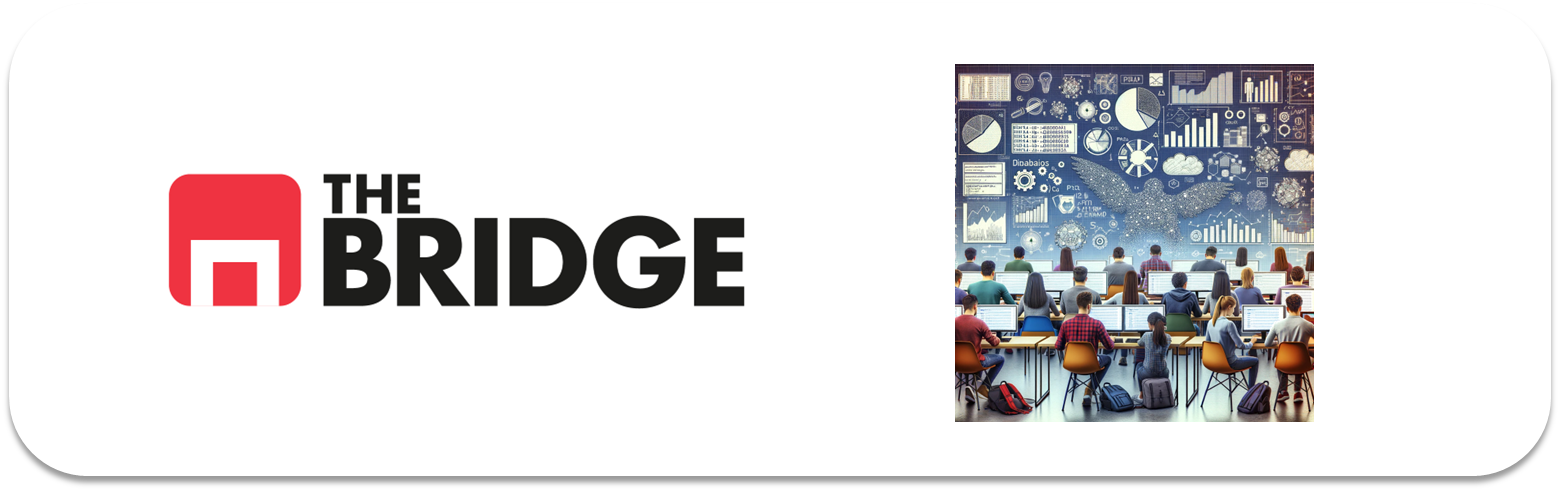

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [1]:
# Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1.- Cargar el dataset
df = pd.read_csv('./data/hard_to_find/obligatoria_hard.csv', sep = "|")

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


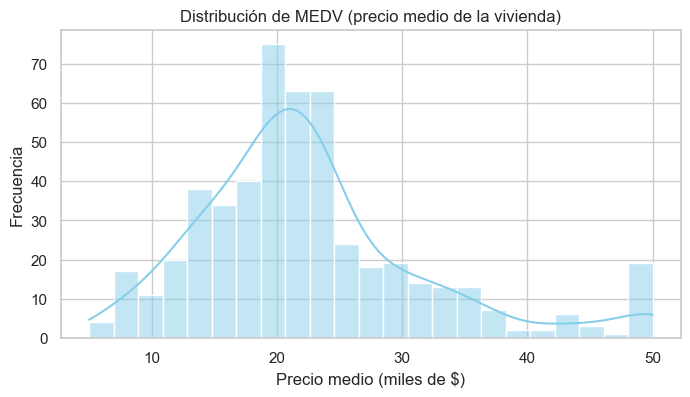

In [ ]:
# 2.- Configuración del estilo gráfico
sns.set(style="whitegrid")

# Histograma con KDE
plt.figure(figsize=(8, 4))
sns.histplot(df['MEDV'], kde=True, color='skyblue')
plt.title('Distribución de MEDV (precio medio de la vivienda)')
plt.xlabel('Precio medio (miles de $)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# 3.- Definimos X (todas las columnas excepto MEDV) e y (la variable objetivo)
X = df.drop(columns='MEDV')
y = df['MEDV']

# División 80% entrenamiento, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirmación de formas
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (404, 12)
X_test: (102, 12)
y_train: (404,)
y_test: (102,)


In [ ]:
# 4.- Primeras filas para confirmar que las parejas están bien formadas
X_train.head()
y_train.head()

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
Name: MEDV, dtype: float64

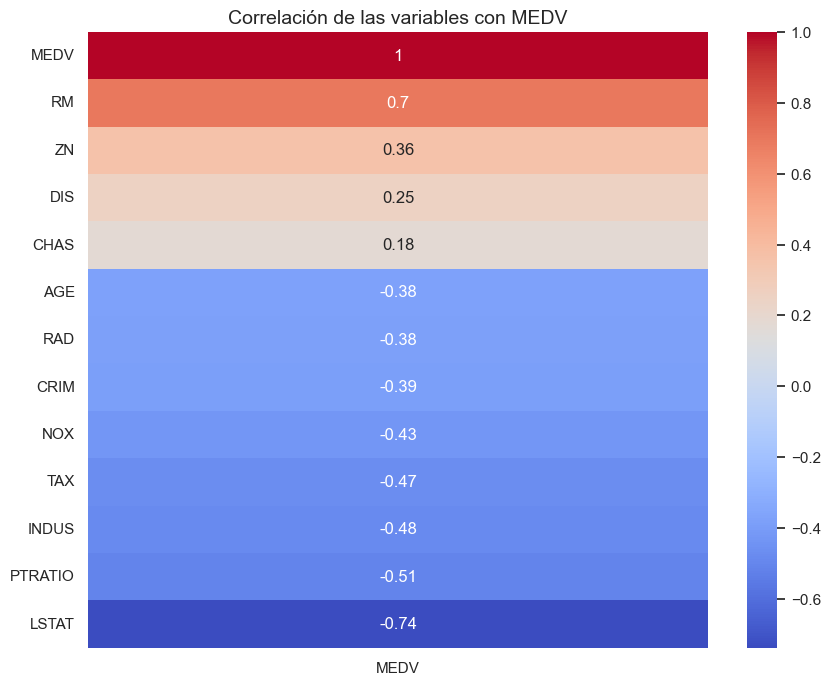

In [ ]:
# 5.- Mapa de calor de correlaciones con MEDV
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix[['MEDV']].sort_values(by='MEDV', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlación de las variables con MEDV', fontsize=14)
plt.show()

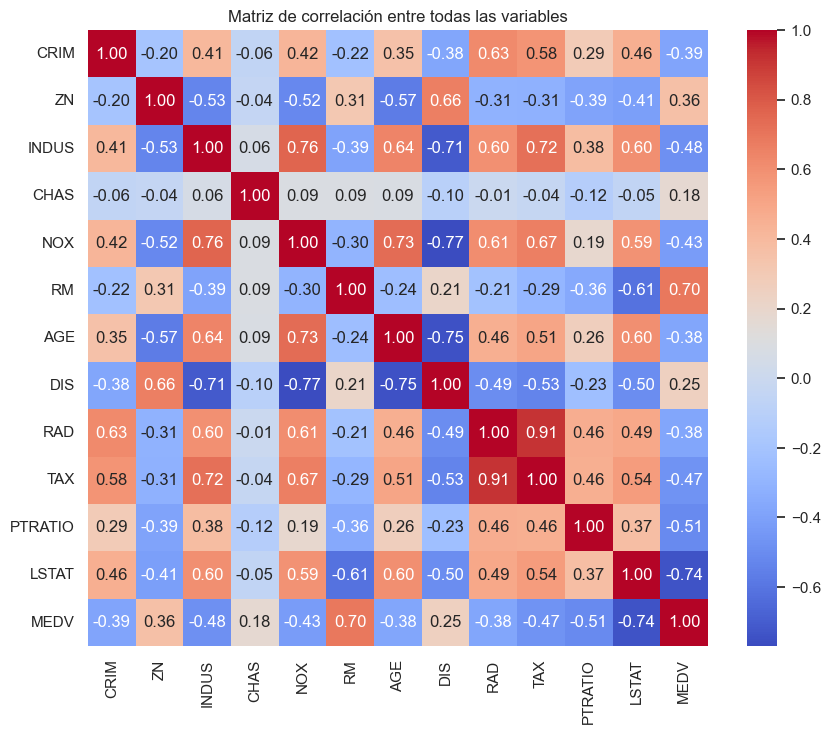

In [ ]:
# Matriz de correlación entre todas las variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre todas las variables")
plt.show()

In [ ]:
# 6.- Tratamiento de variables 
from sklearn.preprocessing import StandardScaler

# Instanciar el escalador
scaler = StandardScaler()

# Ajustar con train y transformar ambos datasets
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [12]:
# 7.- Entrenamiento de un modelo de Regresión Lineal
from sklearn.linear_model import LinearRegression

# Instanciamos el modelo
lr = LinearRegression()

# Entrenamos con los datos escalados
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# 8.- Análisis de coeficientes
# Coeficientes ordenados
coef_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coef': lr.coef_
}).sort_values(by='Coef', key=abs, ascending=False)

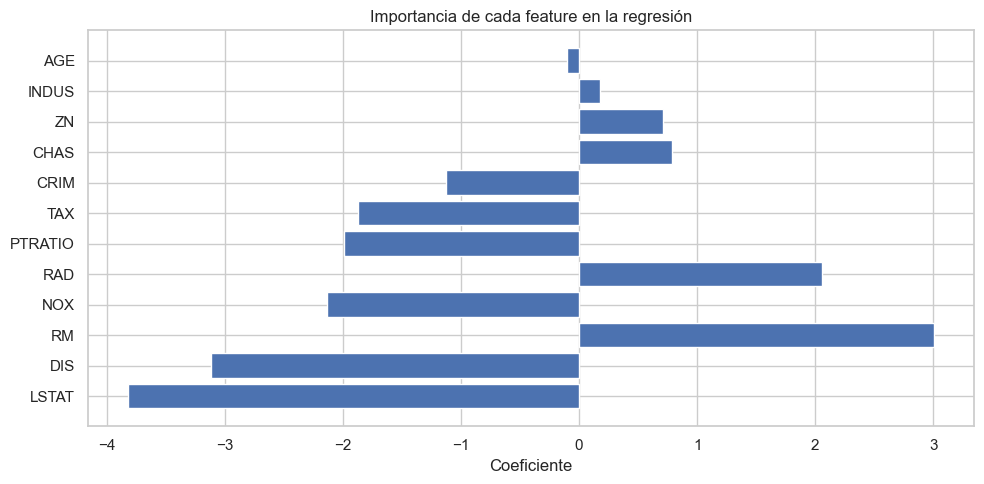

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.barh(coef_df['Feature'], coef_df['Coef'])
plt.xlabel('Coeficiente')
plt.title('Importancia de cada feature en la regresión')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 9.- Evaluación del modelo y análisis de coeficientes
# Predicciones
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

In [14]:
# Cálculo de métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Métricas de train
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# Métricas de test
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# Resultados
print(f"Train - MAE: {mae_train:.2f} | RMSE: {rmse_train:.2f} | R²: {r2_train:.2f}")
print(f"Test  - MAE: {mae_test:.2f} | RMSE: {rmse_test:.2f} | R²: {r2_test:.2f}")

Train - MAE: 3.42 | RMSE: 4.75 | R²: 0.74
Test  - MAE: 3.11 | RMSE: 4.77 | R²: 0.69


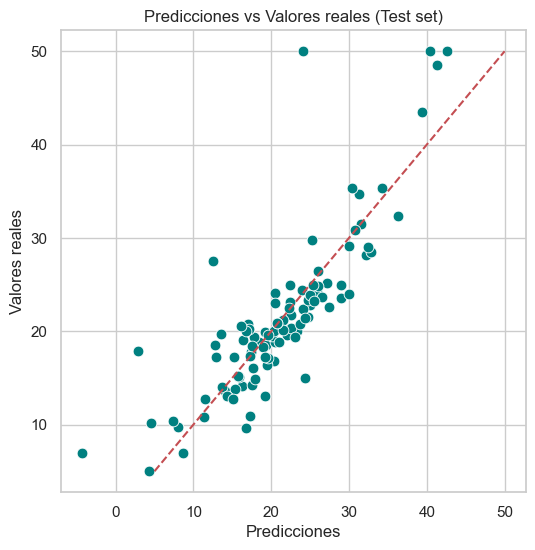

In [17]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test_pred, y=y_test, color='teal', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Predicciones vs Valores reales (Test set)')
plt.grid(True)
plt.show()

In [ ]:
# 10.- Regularización
# Penalización L2: Ridge
from sklearn.linear_model import Ridge

# Lista de valores de alpha a probar
alphas = [0.1, 1, 10]

# Diccionario para guardar resultados
resultados_ridge = {}

# Entrenamiento y evaluación
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)

    # Predicciones
    y_train_pred_ridge = ridge.predict(X_train_scaled)
    y_test_pred_ridge = ridge.predict(X_test_scaled)

    # Métricas
    mae_train = mean_absolute_error(y_train, y_train_pred_ridge)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
    r2_train = r2_score(y_train, y_train_pred_ridge)

    mae_test = mean_absolute_error(y_test, y_test_pred_ridge)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))
    r2_test = r2_score(y_test, y_test_pred_ridge)

    # Guardamos resultados
    resultados_ridge[alpha] = {
        "MAE_train": mae_train,
        "RMSE_train": rmse_train,
        "R2_train": r2_train,
        "MAE_test": mae_test,
        "RMSE_test": rmse_test,
        "R2_test": r2_test
    }

# Mostrar resultados
for alpha, res in resultados_ridge.items():
    print(f"\n Ridge alpha = {alpha}")
    print(f"Train - MAE: {res['MAE_train']:.2f}, RMSE: {res['RMSE_train']:.2f}, R²: {res['R2_train']:.2f}")
    print(f"Test  - MAE: {res['MAE_test']:.2f}, RMSE: {res['RMSE_test']:.2f}, R²: {res['R2_test']:.2f}")



 Ridge alpha = 0.1
Train - MAE: 3.42, RMSE: 4.75, R²: 0.74
Test  - MAE: 3.11, RMSE: 4.77, R²: 0.69

 Ridge alpha = 1
Train - MAE: 3.42, RMSE: 4.75, R²: 0.74
Test  - MAE: 3.11, RMSE: 4.78, R²: 0.69

 Ridge alpha = 10
Train - MAE: 3.40, RMSE: 4.76, R²: 0.74
Test  - MAE: 3.09, RMSE: 4.81, R²: 0.69


In [20]:
# Penalización L1: Lasso
from sklearn.linear_model import Lasso

# Lista de valores de alpha a probar
alphas_lasso = [0.01, 0.1, 1]

# Diccionario para guardar resultados
resultados_lasso = {}

for alpha in alphas_lasso:
    lasso = Lasso(alpha=alpha, max_iter=10000)  # max_iter por seguridad si tarda en converger
    lasso.fit(X_train_scaled, y_train)

    # Predicciones
    y_train_pred_lasso = lasso.predict(X_train_scaled)
    y_test_pred_lasso = lasso.predict(X_test_scaled)

    # Métricas
    mae_train = mean_absolute_error(y_train, y_train_pred_lasso)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
    r2_train = r2_score(y_train, y_train_pred_lasso)

    mae_test = mean_absolute_error(y_test, y_test_pred_lasso)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
    r2_test = r2_score(y_test, y_test_pred_lasso)

    # Guardamos resultados
    resultados_lasso[alpha] = {
        "MAE_train": mae_train,
        "RMSE_train": rmse_train,
        "R2_train": r2_train,
        "MAE_test": mae_test,
        "RMSE_test": rmse_test,
        "R2_test": r2_test,
        "N_coefs_no_cero": (lasso.coef_ != 0).sum()
    }

# Mostrar resultados
for alpha, res in resultados_lasso.items():
    print(f"\n Lasso alpha = {alpha}")
    print(f"Train - MAE: {res['MAE_train']:.2f}, RMSE: {res['RMSE_train']:.2f}, R²: {res['R2_train']:.2f}")
    print(f"Test  - MAE: {res['MAE_test']:.2f}, RMSE: {res['RMSE_test']:.2f}, R²: {res['R2_test']:.2f}")
    print(f"Features usados: {res['N_coefs_no_cero']}/12")


 Lasso alpha = 0.01
Train - MAE: 3.42, RMSE: 4.76, R²: 0.74
Test  - MAE: 3.10, RMSE: 4.78, R²: 0.69
Features usados: 12/12

 Lasso alpha = 0.1
Train - MAE: 3.40, RMSE: 4.81, R²: 0.73
Test  - MAE: 3.17, RMSE: 4.94, R²: 0.67
Features usados: 10/12

 Lasso alpha = 1
Train - MAE: 3.75, RMSE: 5.35, R²: 0.67
Test  - MAE: 3.46, RMSE: 5.23, R²: 0.63
Features usados: 5/12


In [21]:
# L1 + L2: ElasticNet
from sklearn.linear_model import ElasticNet

# Definir valores de prueba
configs = [
    (0.1, 0.3),
    (0.1, 0.5),
    (0.1, 0.7)
]

# Guardar resultados
resultados_elastic = {}

for alpha, l1_ratio in configs:
    elastic = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
    elastic.fit(X_train_scaled, y_train)

    y_train_pred = elastic.predict(X_train_scaled)
    y_test_pred = elastic.predict(X_test_scaled)

    mae_train = mean_absolute_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)

    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)

    n_features = (elastic.coef_ != 0).sum()

    resultados_elastic[(alpha, l1_ratio)] = {
        "MAE_train": mae_train,
        "RMSE_train": rmse_train,
        "R2_train": r2_train,
        "MAE_test": mae_test,
        "RMSE_test": rmse_test,
        "R2_test": r2_test,
        "N_coefs_no_cero": n_features
    }

# Mostrar resultados
for config, res in resultados_elastic.items():
    alpha, l1_ratio = config
    print(f"\n ElasticNet alpha={alpha}, l1_ratio={l1_ratio}")
    print(f"Train - MAE: {res['MAE_train']:.2f}, RMSE: {res['RMSE_train']:.2f}, R²: {res['R2_train']:.2f}")
    print(f"Test  - MAE: {res['MAE_test']:.2f}, RMSE: {res['RMSE_test']:.2f}, R²: {res['R2_test']:.2f}")
    print(f"Features usados: {res['N_coefs_no_cero']}/12")



 ElasticNet alpha=0.1, l1_ratio=0.3
Train - MAE: 3.39, RMSE: 4.82, R²: 0.73
Test  - MAE: 3.09, RMSE: 4.89, R²: 0.67
Features usados: 12/12

 ElasticNet alpha=0.1, l1_ratio=0.5
Train - MAE: 3.39, RMSE: 4.81, R²: 0.73
Test  - MAE: 3.11, RMSE: 4.90, R²: 0.67
Features usados: 12/12

 ElasticNet alpha=0.1, l1_ratio=0.7
Train - MAE: 3.39, RMSE: 4.81, R²: 0.73
Test  - MAE: 3.13, RMSE: 4.91, R²: 0.67
Features usados: 11/12


11.- ****Conclusiones finales**: 

Me quedo con el modelo de regresión lineal sin regularización.

**¿Por qué?**

Porque es el que mejor rendimiento ha tenido: tiene el R² más alto y los errores más bajos, tanto en entrenamiento como en test. Además, no muestra señales claras de sobreajuste, así que no es necesario complicarlo más con regularización.
Los modelos regularizados (Ridge, Lasso, ElasticNet) no han mejorado los resultados y, en algunos casos, han eliminado variables importantes, perdiendo precisión.
